In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from typing import Optional
from visualise import visualise

ImportError: cannot import name 'visualise' from 'visualise' (C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\visualise\__init__.py)

# Task 1

## Task 1.a

The main objective is to evaluate the performance of linear regression for this specific dataset by measuring the prediction error using MSE, both for the training and test datasets.

1. Load the data from the file `linear.npz`, containing the training (`X_train`, `Y_train`) and test (`X_test`, `Y_test`) datasets.
2. Compute the estimated weights for the training data using the linear regression formula: $(X_{\text{train}}^T X_{\text{train}})^{-1} X_{\text{train}}^T Y_{\text{train}}$.
3. Calculate the estimated weights for the test data using the same formula.
4. Use the estimated weights to predict output values for both the training and test data.
5. Compute the Mean Squared Error (MSE) for both the training and test data by comparing the predicted values to the actual values.
6. Print out the estimated weight vector for the training data, the estimated weight vector for the test data, as well as the MSE for both the training and test data.

In [8]:
data = np.load('./lin_reg.data/linear.npz')
X_train, Y_train, X_test, Y_test = data['X'], data['Y'], data['X_test'], data['Y_test']

# Calcule le poids des données entrainées
X_transpose_train = np.transpose(X_train)
estimated_weights_train = np.linalg.inv(X_transpose_train @ X_train) @ X_transpose_train @ Y_train

# Calcule le poids des données test
X_transpose_test = np.transpose(X_test)
estimated_weights_test = np.linalg.inv(X_transpose_test @ X_test) @ X_transpose_test @ Y_test

# Pour trouver le nouvel Y
Y_train_pred = X_train @ estimated_weights_train
Y_test_pred = X_test @ estimated_weights_test

# Calcule la moyenne des moindres carrés
mse_train = np.mean((Y_train - Y_train_pred) ** 2)
mse_test = np.mean((Y_test - Y_test_pred) ** 2)

# Affiche les données
print("Estimated weight vector:", estimated_weights_train)
print("Reference weight vector:", estimated_weights_test)
print("Mean squared error (train):", mse_train)
print("Mean squared error (test):", mse_test)

Estimated weight vector: [ 0.12573022 -0.13210486  0.64042265  0.10490012 -0.53566937  0.36159505
  1.30400005  0.94708096 -0.70373524 -1.26542147]
Reference weight vector: [ 0.12573022 -0.13210486  0.64042265  0.10490012 -0.53566937  0.36159505
  1.30400005  0.94708096 -0.70373524 -1.26542147]
Mean squared error (train): 2.627222358748058e-28
Mean squared error (test): 2.504012146113851e-28


## Task 1.b

The main objective is to assess the performance of linear regression considering a non-zero bias term for this specific dataset by measuring the prediction error using MSE, both for the training and test datasets.

1. Load the data from the file `affine1.npz`, containing the training (`X_train`, `Y_train`) and test (`X_test`, `Y_test`) datasets.
2. Add a column of ones to the feature matrix `X_train` and `X_test` to include the bias term.
3. Compute the estimated weights for the training data using the linear regression formula: $(X_{\text{train}_{\text{bias}}}^T X_{\text{train}_{\text{bias}}})^{-1} X_{\text{train}_{\text{bias}}}^T Y_{\text{train}}$, where $X_{\text{train}_{\text{bias}}}$ includes the bias term.
4. Calculate the estimated weights for the test data using the same formula applied to $X_{\text{test}_{\text{bias}}}$.
5. Use the estimated weights to predict output values for both the training and test data.
6. Compute the Mean Squared Error (MSE) for both the training and test data by comparing the predicted values to the actual values.
7. Print out the estimated weight vector for the training data, the estimated weight vector for the test data, as well as the MSE for both the training and test data.

In [3]:
data = np.load('./lin_reg.data/affine1.npz')
X_train, Y_train, X_test, Y_test = data['X'], data['Y'], data['X_test'], data['Y_test']

X_train_bias = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
X_test_bias = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)

weights_train = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ Y_train
weights_test = np.linalg.inv(X_test_bias.T @ X_test_bias) @ X_test_bias.T @ Y_test

Y_train_pred = X_train_bias @ weights_train
Y_test_pred = X_test_bias @ weights_test

mse_train = np.mean((Y_train - Y_train_pred) ** 2)
mse_test = np.mean((Y_test - Y_test_pred) ** 2)

print("Estimated weight vector :", weights_train)
print("Reference weight vector :", weights_test)
print("Mean squared error (train) :", mse_train)
print("Mean squared error (test) :", mse_test)

Estimated weight vector : [ 0.34558419  0.82161814  0.33043708 -1.30315723  0.90535587  0.44637457
 -0.53695324  0.5811181   0.3645724   0.2941325   0.50702622]
Reference weight vector : [ 0.34558419  0.82161814  0.33043708 -1.30315723  0.90535587  0.44637457
 -0.53695324  0.5811181   0.3645724   0.2941325   0.50702622]
Mean squared error (train) : 1.6980033769655973e-27
Mean squared error (test) : 2.8709014923708284e-27


## Task 1.c

The provided code conducts linear regression to find the weights that generated the dataset in the file `affine2.npz`. This dataset includes noise. Additionally, the code adds small perturbations to the weight vector and bias found from the regression, then compares the new Mean Squared Error (MSE) for both the training and test data.

1. Load the data from the file `affine2.npz`, containing the training (`X_train`, `Y_train`) and test (`X_test`, `Y_test`) datasets.
2. Add a column of ones to the feature matrix `X_train` and `X_test` to include the bias term.
3. Compute the estimated weights for the training data using linear regression.
4. Calculate the estimated weights for the test data using linear regression.
5. Introduce small perturbations to both the weight vector and the bias term.
6. Predict output values for both the training and test data using the perturbed weights.
7. Compute the Mean Squared Error (MSE) for both the training and test data using the predictions with perturbed weights.
8. Print out the estimated weight vector for the training data, the estimated weight vector for the test data, as well as the MSE for both the training and test data with the perturbed weights.

In [4]:
data = np.load('./lin_reg.data/affine2.npz')
X_train, Y_train, X_test, Y_test = data['X'], data['Y'], data['X_test'], data['Y_test']

X_train_bias = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
X_test_bias = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)

weights_train = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ Y_train
weights_test = np.linalg.inv(X_test_bias.T @ X_test_bias) @ X_test_bias.T @ Y_test

epsilon = 0.01  # Small perturbation
perturbations = np.random.normal(0, epsilon, size=weights_train.shape)
weights_train_perturbed = weights_train + perturbations
bias_perturbation = np.random.normal(0, epsilon)
weights_train_perturbed[-1] += bias_perturbation

Y_train_pred_perturbed = X_train_bias @ weights_train_perturbed
Y_test_pred_perturbed = X_test_bias @ weights_train_perturbed

mse_train_perturbed = np.mean((Y_train - Y_train_pred_perturbed) ** 2)
mse_test_perturbed = np.mean((Y_test - Y_test_pred_perturbed) ** 2)

print("Estimated weight vector :", weights_train)
print("Reference weight vector :", weights_test)
print("Mean squared error (train) :", mse_train_perturbed)
print("Mean squared error (test) :", mse_test_perturbed)

Estimated weight vector : [ 0.190953   -0.52262686 -0.41115621 -2.44095349  1.80102546  1.14394605
 -0.32649094  0.76876765  0.28275398 -0.55621223  2.00070245]
Reference weight vector : [ 0.18901442 -0.52097092 -0.41346081 -2.44307407  1.80372162  1.14432999
 -0.32644544  0.77399663  0.28039932 -0.5581744   2.00673715]
Mean squared error (train) : 0.03789887622075304
Mean squared error (test) : 0.03448114442654987


## Task 1.d

The provided code conducts linear regression using Ridge Regression to find the weights that generated the dataset in the file `rank.npz`. Here's a summary of what the code does and its purpose:

1. Load the data from the file `rank.npz`, containing the training (`X_train`, `Y_train`) and test (`X_test`, `Y_test`) datasets.
2. Add a column of ones to the feature matrix `X_train` and `X_test` to include the bias term. Then, remove the first column to account for the "weirdness" of the data mentioned in the prompt.
3. Calculate the weights using Ridge Regression, which introduces regularization to handle potential rank deficiencies or singularities in the design matrix $X$.
4. Use the estimated weights to predict output values for both the training and test data.
5. Compute the Mean Squared Error (MSE) for both the training and test data by comparing the predicted values to the actual values.
6. Print out the weights for the training and test data, as well as the MSE for both.

The main objective is to assess the performance of linear regression with Ridge Regression regularization on the dataset, especially considering the potential issues with the design matrix $X$ mentioned in the prompt. The regularization parameter ($\alpha$) is set to 0.1, but it can be adjusted based on the specific requirements of the problem or the characteristics of the dataset.

In [5]:
data = np.load('./lin_reg.data/rank.npz')
X_train, Y_train, X_test, Y_test = data['X'], data['Y'], data['X_test'], data['Y_test']

X_train_bias = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)[:,1:]
X_test_bias = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)[:,1:]

# Calculate weights using Ridge Regression
alpha = 0.1  # Regularization parameter
I = np.eye(X_train_bias.shape[1])  # Identity matrix
weights_train = np.linalg.inv(X_train_bias.T @ X_train_bias + alpha * I) @ X_train_bias.T @ Y_train
weights_test = np.linalg.inv(X_test_bias.T @ X_test_bias + alpha * I) @ X_test_bias.T @ Y_test

Y_train_pred = X_train_bias @ weights_train
Y_test_pred = X_test_bias @ weights_test

mse_train = np.mean((Y_train - Y_train_pred) ** 2)
mse_test = np.mean((Y_test - Y_test_pred) ** 2)

print("Weights (training data) with Ridge Regression:", weights_train)
print("Weights (test data) with Ridge Regression:", weights_test)
print("Mean Squared Error (training data):", mse_train)
print("Mean Squared Error (test data):", mse_test)

Weights (training data) with Ridge Regression: [-0.51663197  2.45726012  0.00956116]
Weights (test data) with Ridge Regression: [-5.15170877e-01  2.45844728e+00  2.02656335e-03]
Mean Squared Error (training data): 2.169118341862612e-05
Mean Squared Error (test data): 2.3599245861156006e-06


# Task 1.e

The provided code conducts linear regression to find the weights that generated the dataset in the file `zero.npz`. Here's a summary of what the code does and its purpose:

1. Load the data from the file `zero.npz`, containing the training (`X_train`, `Y_train`) and test (`X_test`, `Y_test`) datasets.
2. Add a column of ones to the feature matrix `X_train` and `X_test` to include the bias term.
3. Compute the estimated weights for the training data using linear regression.
4. Use the estimated weights to predict output values for both the training and test data.
5. Compute the Mean Squared Error (MSE) for both the training and test data by comparing the predicted values to the actual values.
6. Print out the estimated weight vector for the training data, as well as the MSE for both training and test data.

Regarding the significance of coefficients and the high error:

1. Some coefficients might be negligible if their corresponding features have little influence on the output. This could happen due to either multicollinearity among features or the features being irrelevant to predicting the output.
2. The error might be large due to several reasons:
   - The features might not have a strong linear relationship with the output, leading to poor performance of linear regression.
   - There could be outliers or noise in the data, making it challenging for the linear regression model to accurately capture the underlying patterns.
   - Overfitting or underfitting of the model may occur if the model complexity does not match the complexity of the data.

To determine whether there is output noise in the dataset, we need to examine the residuals (difference between actual and predicted values) and look for patterns or randomness. Additionally, analyzing the significance of coefficients and conducting hypothesis testing could provide insights into the relevance of features.

Lastly, the provided code also plots the outputs using a 3D scatter plot to visualize the data and predictions for both training and test datasets. This visualization helps in understanding the relationships between features and the output.

In [6]:
data = np.load('./lin_reg.data/zero.npz')
X_train, Y_train, X_test, Y_test = data['X'], data['Y'], data['X_test'], data['Y_test']

X_train_bias = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
X_test_bias = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)

weights_train = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ Y_train

Y_train_pred = X_train_bias @ weights_train

mse_train = np.mean((Y_train - Y_train_pred) ** 2)

Y_test_pred = X_test_bias @ weights_train
mse_test = np.mean((Y_test - Y_test_pred) ** 2)

print("Estimated weight vector:", weights_train)
print("Mean squared error (train):", mse_train)
print("Mean squared error (test):", mse_test)

Estimated weight vector: [ 9.98513975e+00  2.42672490e-03 -4.75133220e-02  3.25770239e-01]
Mean squared error (train): 310.5697311190517
Mean squared error (test): 253.5241169079045


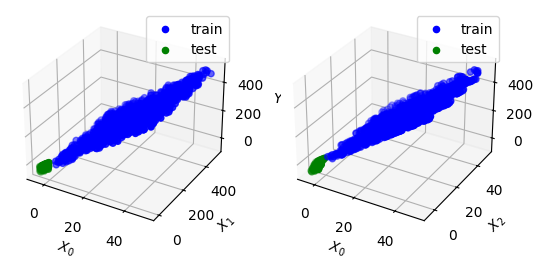

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'})
ax1.scatter(X_train[:, 0], X_train[:, 1], Y_train, c='blue', label='train')
ax1.scatter(X_test[:, 0], X_test[:, 1], Y_test, c='green', label='test')
ax1.set_xlabel(f'$X_{0}$')
ax1.set_ylabel(f'$X_{1}$')
ax1.set_zlabel('$Y$')
ax1.legend()
ax2.scatter(X_train[:, 0], X_train[:, 2], Y_train, c='blue', label='train')
ax2.scatter(X_test[:, 0], X_test[:, 2], Y_test, c='green', label='test')
ax2.legend()
ax2.set_xlabel(f'$X_{0}$')
ax2.set_ylabel(f'$X_{2}$')
ax2.set_zlabel('$Y$')
plt.show()

# Task 2

**Hoeffding equation. You are testing a hypothesis on 43 samples, sampled from the data distribution. After measurement, you find your error to be 0.1. Your boss told you that she will tolerate at most an error of 0.2 in production (averaged for the long run). Can you bound the probability that the error will be larger (and she will be unhappy with you)**

The Hoeffding Inequality is used to bound the probability that the deviation between the sample mean and the true mean of a random variable is larger than a certain value. Given a set of independent and identically distributed (i.i.d) random variables $ X_1, X_2, ..., X_N $, the Hoeffding Inequality states that:

$$ P(|\nu - \mu| \geq \epsilon) \leq 2e^{-2N\epsilon^2} $$

Where:
- $ \nu $ is the sample mean,
- $ \mu $ is the true mean,
- $ N $ is the number of samples,
- $ \epsilon $ is the deviation we're interested in,

In this case, $ N = 43 $ and $ \epsilon = 0.2 $. We want to find the probability that $ |\nu - \mu| \geq 0.2 $.

We can calculate this probability using the Hoeffding Inequality.

In [39]:
epsilon = 0.2
N = 43
probabilite = 2 * np.exp(-2 * epsilon**2 * N)
print("La probabilité que l'erreur dépasse 0.2 est:", probabilite)

La probabilité que l'erreur dépasse 0.2 est: 0.06412937065572148


The output -> 0.06412937065572148 

and $0.06412937065572148 < 0.2$ so the boss will be happy !

# Task 3

**Implement the Perceptron Learning Algorithm.**

* a. Find a linear separator that separates the two classes (−1 and 1) in the pla.npz dataset.

* b. Plot the training data and the separator in each iteration. (You can use the code in visualise.py.) A simple way to do nonblocking plot in Matplotlib is:

```py
import matlotlib.pyplot as plt
from visualise import visualise
fig, ax = None, None
while not done:
w = calculate()
fig, ax = visualise(w, X, Y, block=False, fig=fig, ax=ax)
plt.pause(0.5)
```

* c. Repeat a) and b) on pocket.npz as well. How did it perform? Can you do better with a small modification?

____________

The Perceptron Learning Algorithm is used to find a linear separator that separates two classes. Given a dataset with features $ X $ and labels $ Y $, the PLA tries to find weights $ w $ such that $ w^T X $ classifies the data points correctly.


The following code implements the Perceptron Learning Algorithm (PLA) **to find a line (or hyperplane) that separates two groups of points in a dataset**.

* **Initialization of Weights**: The model weights are initialized randomly to define the initial decision line.

* **Iteration Loop**: The algorithm performs a certain number of iterations defined by max_iteration. At each iteration, it attempts to improve the separation between the two groups of points.

* **Calculation of Accuracy**: At each iteration, the algorithm calculates the current accuracy of the obtained separation by comparing the model's predictions with the actual labels of the points.

* **Selection of Misclassified Sample**: If the accuracy is not perfect (i.e., there are misclassified points), the algorithm selects one of these points for weight update.

* **Weight Update**: The model weights are updated based on the selected misclassified sample, using the Perceptron update rule. This rule adjusts the model weights to minimize the classification error.

* **Visualization (Optional)**: If plot_every is set, the visualization of the algorithm's progress is updated at each iteration. This allows visualizing the decision line evolving over time.

* **Animation**: An animation is created to visualize the evolution of the separation over the different iterations. Basicly here we have 4.


**But I can't run my code because I have a problem with the visualise.py file**

TypeError: 'module' object is not callable

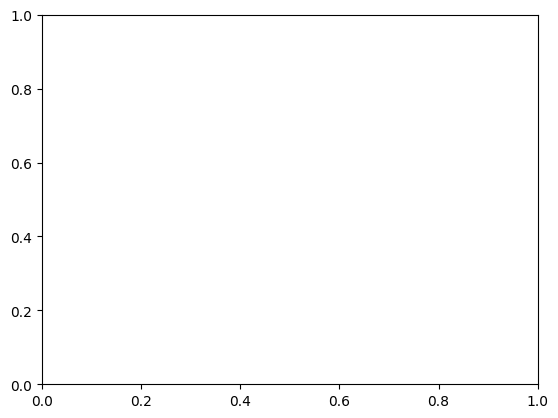

In [38]:
def pla(data,
        plot_every: Optional[int] = 1,
        max_iteration: int = 100) -> tuple[np.ndarray, float] | tuple[np.ndarray, float, list]:
    
    x, y = data['X'], data['Y']
    N, d = x.shape

    w = np.random.rand(d + 1)  # Initialize weight vector randomly
    if plot_every:
        fig, ax = plt.subplots()
        artists = []
    for i in range(max_iteration):
        acc = np.sum(np.sign(x @ w[1:] + w[0]) == y) / N
        if acc == 1:
            break  # If all points are classified correctly, stop iterating
        
        # Choose a misclassified sample
        misclassified_idx = np.where(np.sign(x @ w[1:] + w[0]) != y)[0][0]
        x_misclassified = np.concatenate(([1], x[misclassified_idx]))

        # Update the weight vector
        w += y[misclassified_idx] * x_misclassified
        if plot_every and i % plot_every == 0:
            _fig, _ax, artists_ = visualise(
                w,
                x,
                y,
                ax=ax,
                animated=True,
                title=f'Training, accuracy: {acc:0.3}')
            artists.append(artists_)
    if plot_every:
        ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=1000)
        return w, (ani, fig)
    else:
        return w, acc

# Load the data
data = np.load('./lin_reg.data/pla.npz')

# Run PLA
w, (ani, fig) = pla(data)

# Display the animation
from IPython.display import HTML
HTML(ani.to_jshtml())